In [1]:
#数据库查询操作
import pymysql
import numpy as np
import matplotlib.pyplot as plt
connect=pymysql.Connection(
    host='localhost',
    port=3306,
    user='root',
    passwd='TianMao@19940818',
    db='websecurity'   
)
cursor=connect.cursor()

In [2]:
#常用的密码排名（前20名），画出表格
sql1="SELECT passwd, count(*) AS count FROM csdn GROUP BY passwd  ORDER BY count DESC  LIMIT 20"
cursor.execute(sql1)
result1=cursor.fetchall()
dtype1=np.dtype([('passwd','S20'),('count',np.int)])
data1=np.fromiter(result1,dtype=dtype1)

#python中将bytes串转换为str，使用decode解码即可
passwd_data=list(temp.decode('ascii') for temp in data1['passwd'])
count_data=list(data1['count'])
mean_count=np.mean(count_data)

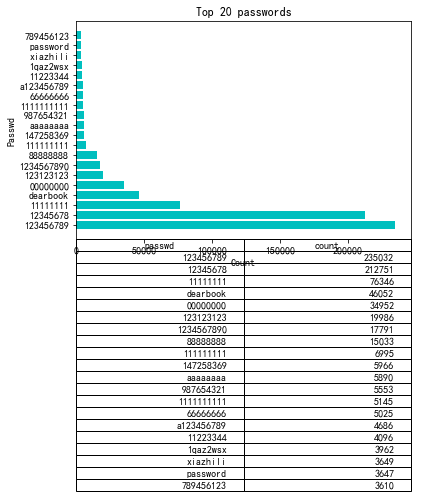

In [74]:
import matplotlib.pyplot as plt

plt.barh(range(20),count_data,color='c',tick_label=passwd_data,label=count_data)
plt.xlabel("Count")
plt.ylabel("Passwd")
plt.title("Top 20 passwords")
data=[[passwd_data[i],count_data[i]] for i in range(20)]
table_head=["passwd","count"]
plt.table(cellText=data,colLabels=table_head,colWidths=[0.5]*2)
plt.savefig("pictures/1_col.png")
plt.show()
#xiazhili同学出现3649次

In [28]:
#密码构成元素分析（数字、字符、字母等）和结构分析
#全为数字
sql_2=[]#保存所有的sql语句
sql2_1="SELECT count(id) AS count FROM csdn where passwd regexp '^[0-9]+$'"
sql_2.append(sql2_1)
# cursor.execute(sql2_1)
# result=cursor.fetchall()
# print(result)
#全为字母
sql2_2="SELECT count(id) AS count FROM csdn where passwd regexp'^[A-Za-z]+$'"
sql_2.append(sql2_2)
#全为符号
sql2_3="SELECT count(id) AS count FROM csdn where passwd regexp'^[^A-Za-z0-9]+$'"
sql_2.append(sql2_3)
#字母数字的结合
sql2_4="SELECT count(id) AS count FROM csdn where passwd  not regexp '[^0-9a-zA-Z]' and passwd regexp '[a-zA-Z]' and passwd regexp '[0-9]'"
sql_2.append(sql2_4)
#字母符号的结合
sql2_5="SELECT count(id) AS count FROM csdn where passwd  not regexp '[a-zA-Z]' and passwd regexp '[^A-Za-z0-9]' and passwd regexp '[0-9]'"
sql_2.append(sql2_5)
#数字符号的结合
sql2_6="SELECT count(id) AS count FROM csdn where passwd  not regexp '[0-9]' and passwd regexp '[^A-Za-z0-9]' and passwd regexp '[A-Za-z]'"
sql_2.append(sql2_6)
#字母数字符号结合
sql2_7="SELECT count(id) AS count FROM csdn where passwd  regexp '[0-9]' and passwd regexp '[^A-Za-z0-9]' and passwd regexp '[A-Za-z]'"
sql_2.append(sql2_7)

#换出饼状图

result2=[]#保存所有的结果
print("query start")
for i in range(7):
    cursor.execute(sql_2[i])
    result2.append(cursor.fetchall())
    print(i+1)
print("query over!")

query start
1
2
3
4
5
6
7
query over!


outcome2: [2893861, 794126, 1820, 2504685, 40386, 33742, 160011]
total: 6428631


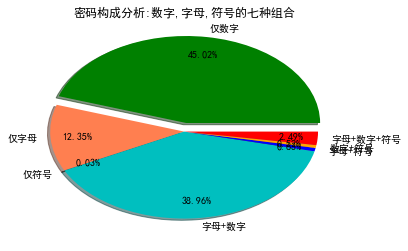

In [73]:
from functools import reduce
import matplotlib
#matplotlib中中文显示
matplotlib.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
#取出最终结果，放入list中
outcome2=[ result2[i][0][0] for i in range(7)]
print("outcome2:",outcome2)
#使用reduce累加，验证结果正确与否，总共6428631条
def add(x,y):
    return x+y
print("total:",reduce(add,outcome2))
#绘制pie状图
labels_2=[u"仅数字",u"仅字母",u"仅符号",u"字母+数字",u"字母+符号",u"数字+符号",u"字母+数字+符号"]


colors = ["green","coral","red","c","blue","orange","red"]
expl=[0.1,0,0,0,0.0,0,0]
plt.pie(outcome2,explode=expl,labels=labels_2,colors=colors,autopct='%1.2f%%',pctdistance=0.8, shadow=True)
plt.title(u"密码构成分析:数字,字母,符号的七种组合")
plt.savefig("pictures/2_pie.png")
plt.show()


In [75]:
#密码长度的概率分布，画出折线图
#密码的长度[1,2,3,4...max]，首先使用sql查询最长密码的长度
sql3_1="SELECT length(passwd) AS length,count(*) AS count FROM csdn GROUP BY length(passwd) ORDER BY length ASC"
cursor.execute(sql3_1)
result3=cursor.fetchall()
dtype3=np.dtype([('length',np.int),('count',np.int)])
data3=np.fromiter(result3,dtype=dtype3)

length_3=list(data3['length'])
count_3=list(data3['count'])

length: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 56, 57, 60, 61, 68, 72, 74, 77, 78, 80]
count: [1, 163, 108, 712, 6899, 33235, 83412, 17694, 2338109, 1551737, 930472, 628610, 369295, 167690, 154886, 75265, 49545, 7013, 5916, 2300, 5056, 12, 11, 12, 7, 16, 31, 39, 28, 32, 42, 37, 37, 23, 30, 16, 25, 9, 6, 3, 27, 5, 1, 2, 10, 1, 2, 4, 12, 1, 2, 11, 1, 3, 2, 2, 1, 1, 1, 2, 1, 1, 5]
total: 6428632
mean_len: 9.45767933209


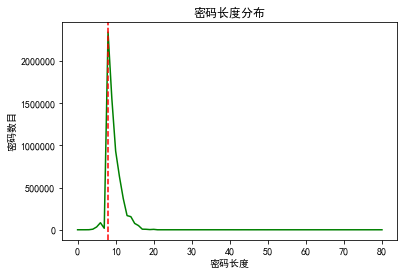

In [90]:
print("length:",length_3)
print("count:",count_3)
#验证密码总条数正确与否
print("total:",reduce(add,count_3))
#绘制折线图
plt.plot(length_3,count_3,color='g')
plt.title(u"密码长度分布")
plt.xlabel(u"密码长度")
plt.ylabel(u"密码数目")
#频率最高的密码长度是8位密码
plt.axvline(8,color='r',ls='--')
#密码长度的加权平均长度
mean_len=np.average(length_3,weights=count_3)
print("mean_len:",mean_len)
plt.savefig("pictures/3_1_line.png")
plt.show()

In [ ]:
#组合方法


In [ ]:
#密码设置成为生日的统计（在sql中使用正则表达式）

In [ ]:
#没有重复的密码
sql="SELECT passwd, count(*) AS count FROM csdn GROUP BY passwd  ORDER BY count DESC  LIMIT 20"

In [12]:
#拼音，英语单词的使用（键盘格式）

In [ ]:
#注册邮箱的使用

In [ ]:
#注册邮箱是学校的统计

In [ ]:
#机器学习算法对口令的安全性进行分析和评估